In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
x = df.drop('math score',axis=1)
y = df['math score']

In [4]:
numerical_features = x.select_dtypes(exclude=object).columns
categorical_features = x.select_dtypes(include=object).columns

scaler = StandardScaler()
encoder = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[("OneHotEncoder",encoder,categorical_features),('StandardScaler',scaler,numerical_features)])

In [5]:
x = preprocessor.fit_transform(x)
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [6]:
x.shape

(1000, 19)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)

In [8]:
import numpy as np
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mse)
    r2Score = r2_score(true,predicted)
    return mae,rmse,r2Score

In [9]:
models = {
    'Linear Regression' : LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'SVR' : SVR(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Ada Boost Regressor' : AdaBoostRegressor(),
    'XGB Regressor' : XGBRegressor(),
    'Cat Boost Regressor' : CatBoostRegressor(verbose=False),
    'KNeighbors Regressor' : KNeighborsRegressor(),
    'Random Forest Regressor' : RandomForestRegressor()
}

model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    model_list.append(list(models.keys())[i])
    train_mae,train_rmse,train_r2Score = evaluate_model(y_train,train_pred)
    test_mae,test_rmse,test_r2Score = evaluate_model(y_test,test_pred)
    r2_list.append(test_r2Score)

    print("Training set performance")
    print(f"Model : {model_list[i]}")
    print(f"Mean Absolute Error : {train_mae:.2f}")
    print(f"Root Mean Squared Error : {train_mae:.2f}")
    print(f"r2_Score : {train_r2Score:.2f}")
    print("-"*50)
    print("Test set performance")
    print(f"Mean Absolute Error : {test_mae:.2f}")
    print(f"Root Mean Squared Error : {test_mae:.2f}")
    print(f"r2_Score : {test_r2Score:.2f}")
    print("="*50)
    print("\n")

Training set performance
Model : Linear Regression
Mean Absolute Error : 4.18
Root Mean Squared Error : 4.18
r2_Score : 0.88
--------------------------------------------------
Test set performance
Mean Absolute Error : 4.42
Root Mean Squared Error : 4.42
r2_Score : 0.87


Training set performance
Model : Ridge
Mean Absolute Error : 4.18
Root Mean Squared Error : 4.18
r2_Score : 0.88
--------------------------------------------------
Test set performance
Mean Absolute Error : 4.43
Root Mean Squared Error : 4.43
r2_Score : 0.87


Training set performance
Model : Lasso
Mean Absolute Error : 5.12
Root Mean Squared Error : 5.12
r2_Score : 0.82
--------------------------------------------------
Test set performance
Mean Absolute Error : 5.29
Root Mean Squared Error : 5.29
r2_Score : 0.81


Training set performance
Model : SVR
Mean Absolute Error : 4.99
Root Mean Squared Error : 4.99
r2_Score : 0.79
--------------------------------------------------
Test set performance
Mean Absolute Error : 

In [10]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','r2_Score']).sort_values(by='r2_Score',ascending=False)

,Model,r2_Score
0,Linear Regression,0.865689
1,Ridge,0.865278
7,Cat Boost Regressor,0.838756
9,Random Forest Regressor,0.835442
6,XGB Regressor,0.824865
5,Ada Boost Regressor,0.824753
2,Lasso,0.805785
8,KNeighbors Regressor,0.775323
3,SVR,0.764959
4,Decision Tree Regressor,0.672294


In [11]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
pred = linear_model.predict(x_test)
print(f"Accuracy : {r2_score(y_test,pred)*100:.2f}%")

Accuracy : 86.57%


Text(0, 0.5, 'Predicted')

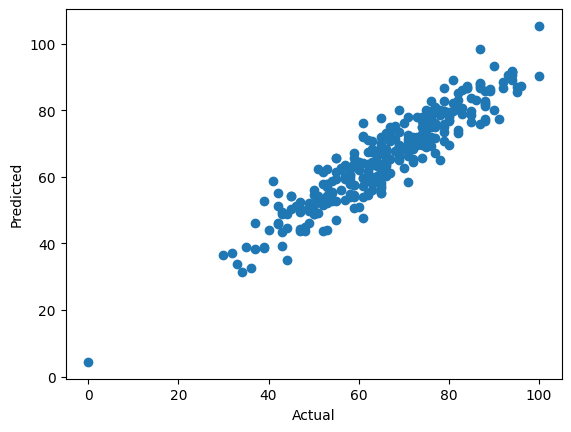

In [12]:
plt.scatter(x=y_test,y=pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

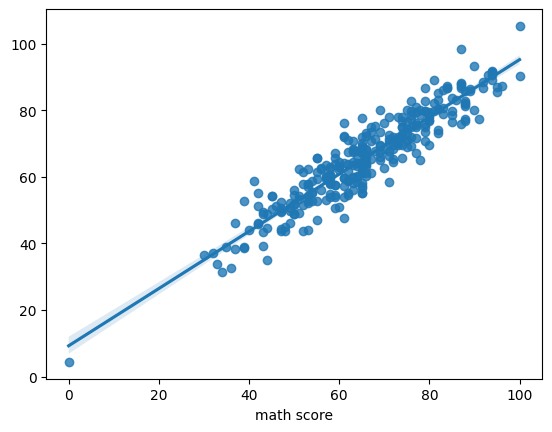

In [13]:
sns.regplot(x=y_test,y=pred)

In [14]:
pd.DataFrame({'Actual Values':y_test,'Predicted Values':pred,'Difference':y_test-pred})

,Actual Values,Predicted Values,Difference
923,54,55.265625,-1.265625
921,35,39.046875,-4.046875
516,74,77.890625,-3.890625
87,71,66.406250,4.593750
879,64,67.671875,-3.671875
...,...,...,...
857,65,71.843750,-6.843750
782,76,69.234375,6.765625
598,69,67.390625,1.609375
93,43,49.515625,-6.515625
